<a href="https://colab.research.google.com/github/baroneleonardo/NO2-Virtual-Sensor/blob/main/FeatureSelection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## SVM

In [1]:
from sklearn.svm import SVR
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import itertools
from tqdm import tqdm
import os
os.environ.setdefault('OMP_NUM_THREADS', '4')
seed = 42

In [2]:
# Load the CSV file
data = pd.read_csv("data_dausare.csv")
data = data.set_index('Datetime')

# Remove any missing values
data = data.dropna(subset = ["NO2(GT)"])
data = data.dropna(subset = ["T"])
target = pd.DataFrame(data['NO2(GT)'])
X = data.drop(['NO2(GT)'], axis=1)


In [ ]:

C, gamma = (2.154435,0.464159)

x_train, x_val, y_train, y_val = train_test_split(X, target, test_size=0.3, random_state=seed, shuffle=True)

K = 3
all_cols = [c for c in list(x_train.columns.values)]
assert 1 <= K and K <= len(all_cols)
print(f'>>> {K=}')

cols = [list(x) for x in itertools.combinations(all_cols, K)]

scaler = StandardScaler()
res = []
for c in tqdm(cols):
    _x_train = x_train.drop(columns=c) 
    _x_val = x_val.drop(columns=c)

    clf = SVR(C=C, gamma=gamma, kernel='rbf')
    clf.fit(scaler.fit_transform(_x_train), y_train)
    r2 = clf.score(scaler.transform(_x_val), y_val)
    y_hat = clf.predict(scaler.transform(_x_val))
    rmse = metrics.mean_squared_error(y_val, y_hat, squared=False)
    res.append({
        'dropping': c,
        'remaining_cols': list(_x_train.columns.values),
        'r2': r2,
        'rmse': rmse,
    })


print(res)
pd.DataFrame(res).to_csv(f'_{K}_select.csv')
print('>>> Saved')

>>> K=3


  0%|          | 0/35 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
  3%|▎         | 1/35 [00:02<01:27,  2.58s/it]/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
  6%|▌         | 2/35 [00:05<01:23,  2.52s/it]/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
  9%|▊         | 3/35 [00:09<01:44,  3.28s/it]/usr/local/lib/python3.10/dist-pack

[{'dropping': ['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)'], 'remaining_cols': ['PT08.S5(O3)', 'T', 'RH', 'AH'], 'r2': 0.7215105235137694, 'rmse': 24.913569432727712}, {'dropping': ['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S5(O3)'], 'remaining_cols': ['PT08.S3(NOx)', 'T', 'RH', 'AH'], 'r2': 0.7648935063933732, 'rmse': 22.890952929945843}, {'dropping': ['PT08.S1(CO)', 'PT08.S2(NMHC)', 'T'], 'remaining_cols': ['PT08.S3(NOx)', 'PT08.S5(O3)', 'RH', 'AH'], 'r2': 0.7899801598699011, 'rmse': 21.63524023430575}, {'dropping': ['PT08.S1(CO)', 'PT08.S2(NMHC)', 'RH'], 'remaining_cols': ['PT08.S3(NOx)', 'PT08.S5(O3)', 'T', 'AH'], 'r2': 0.7957062035699022, 'rmse': 21.33826722726017}, {'dropping': ['PT08.S1(CO)', 'PT08.S2(NMHC)', 'AH'], 'remaining_cols': ['PT08.S3(NOx)', 'PT08.S5(O3)', 'T', 'RH'], 'r2': 0.791023618997269, 'rmse': 21.581427223878936}, {'dropping': ['PT08.S1(CO)', 'PT08.S3(NOx)', 'PT08.S5(O3)'], 'remaining_cols': ['PT08.S2(NMHC)', 'T', 'RH', 'AH'], 'r2': 0.7268408403698724, 'rmse': 24.

## Random Forest


In [ ]:
from sklearn.ensemble import RandomForestRegressor

x_train, x_val, y_train, y_val = train_test_split(X, target, test_size=0.3, random_state=seed, shuffle=True)

K = 3
all_cols = [c for c in list(x_train.columns.values)]
assert 1 <= K and K <= len(all_cols)
print(f'>>> {K=}')

cols = [list(x) for x in itertools.combinations(all_cols, K)]

scaler = StandardScaler()
res = []

max_depth, n_estimators = (7,200)
for c in tqdm(cols):
    _x_train = x_train.drop(columns=c) 
    _x_val = x_val.drop(columns=c)

    clf = RandomForestRegressor(max_depth=max_depth, n_estimators=n_estimators)
    clf.fit(scaler.fit_transform(_x_train), y_train)
    r2 = clf.score(scaler.transform(_x_val), y_val)
    y_hat = clf.predict(scaler.transform(_x_val))
    rmse = metrics.mean_squared_error(y_val, y_hat, squared=False)
    res.append({
        'dropping': c,
        'remaining_cols': list(_x_train.columns.values),
        'r2': r2,
        'rmse': rmse,
    })


print(res)
pd.DataFrame(res).to_csv(f'_{K}_selectRF.csv')
print('>>> Saved')

>>> K=3


  0%|          | 0/35 [00:00<?, ?it/s]<ipython-input-9-c8dc8d907cf9>:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(scaler.fit_transform(_x_train), y_train)
  3%|▎         | 1/35 [00:04<02:16,  4.01s/it]<ipython-input-9-c8dc8d907cf9>:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(scaler.fit_transform(_x_train), y_train)
  6%|▌         | 2/35 [00:06<01:51,  3.37s/it]<ipython-input-9-c8dc8d907cf9>:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(scaler.fit_transform(_x_train), y_train)
  9%|▊         | 3/35 [00:09<01:34,  2.96s/it]<ipython-input-9-c8dc8d907cf9>:21: DataConversionWarning: A column-vector y was passed when a 1d arra

[{'dropping': ['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)'], 'remaining_cols': ['PT08.S5(O3)', 'T', 'RH', 'AH'], 'r2': 0.7451559983771852, 'rmse': 23.83245425287566}, {'dropping': ['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S5(O3)'], 'remaining_cols': ['PT08.S3(NOx)', 'T', 'RH', 'AH'], 'r2': 0.7817782281316893, 'rmse': 22.053656150616284}, {'dropping': ['PT08.S1(CO)', 'PT08.S2(NMHC)', 'T'], 'remaining_cols': ['PT08.S3(NOx)', 'PT08.S5(O3)', 'RH', 'AH'], 'r2': 0.808867006941363, 'rmse': 20.63951037702409}, {'dropping': ['PT08.S1(CO)', 'PT08.S2(NMHC)', 'RH'], 'remaining_cols': ['PT08.S3(NOx)', 'PT08.S5(O3)', 'T', 'AH'], 'r2': 0.8039982427528387, 'rmse': 20.90073421833073}, {'dropping': ['PT08.S1(CO)', 'PT08.S2(NMHC)', 'AH'], 'remaining_cols': ['PT08.S3(NOx)', 'PT08.S5(O3)', 'T', 'RH'], 'r2': 0.7907472033390642, 'rmse': 21.595695518324785}, {'dropping': ['PT08.S1(CO)', 'PT08.S3(NOx)', 'PT08.S5(O3)'], 'remaining_cols': ['PT08.S2(NMHC)', 'T', 'RH', 'AH'], 'r2': 0.7499467581973388, 'rmse': 23.6

There is no evidence of improvement from one or more feature deletions in the SVMs.
Improvement instead in the Random Forest with the elimination of one of the features: "T", "CO" and "RH", and a combination of two of them (above the three no)

### Select the best combination (drop "CO")

In [24]:
from sklearn.ensemble import RandomForestRegressor
# Load the CSV file
data = pd.read_csv("data_dausare.csv")
data = data.set_index('Datetime')

# Remove any missing values
data = data.dropna(subset = ["NO2(GT)"])
data = data.dropna(subset = ["T"])
target = pd.DataFrame(data['NO2(GT)'])
X = data.drop(['NO2(GT)'], axis=1)

# Delate CO feature
X = X.drop(['PT08.S1(CO)'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, target, test_size = 0.2, random_state = seed, shuffle = True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.15, random_state = seed, shuffle = True)

In [25]:
for max_depth in [2, 3, 4, 5, 7, 20]:
    for n_estimators in [50, 100, 200, 500]:
        clf = RandomForestRegressor(random_state=seed, max_depth=max_depth, n_estimators=n_estimators)
        scaler = StandardScaler()
        scaler_y = StandardScaler()

        clf.fit(scaler.fit_transform(X_train), np.ravel(scaler_y.fit_transform(y_train)))
        r2 = clf.score(scaler.transform(X_val), np.ravel(scaler_y.transform(y_val)))
        y_hat = clf.predict(scaler.transform(X_val))
        rmse = metrics.mean_squared_error(np.ravel(scaler_y.transform(y_val)), y_hat, squared=False)
        print(f'{max_depth=}, {n_estimators=}, {r2=}, {rmse=}')

max_depth=2, n_estimators=50, r2=0.4899815029783906, rmse=0.6908640069407498
max_depth=2, n_estimators=100, r2=0.4887426210237825, rmse=0.69170258419063
max_depth=2, n_estimators=200, r2=0.4870263756042117, rmse=0.6928626034253149
max_depth=2, n_estimators=500, r2=0.487794567257017, rmse=0.6923436189613758
max_depth=3, n_estimators=50, r2=0.6064449005654141, rmse=0.6068793715424696
max_depth=3, n_estimators=100, r2=0.6075821657179794, rmse=0.6060018805723332
max_depth=3, n_estimators=200, r2=0.608831653922582, rmse=0.6050363333463717
max_depth=3, n_estimators=500, r2=0.6110751438709733, rmse=0.6032987888461215
max_depth=4, n_estimators=50, r2=0.6774553265885903, rmse=0.5494074455921544
max_depth=4, n_estimators=100, r2=0.678566337553069, rmse=0.5484604074218099
max_depth=4, n_estimators=200, r2=0.6809374245070572, rmse=0.546433777086093
max_depth=4, n_estimators=500, r2=0.6831954960861424, rmse=0.5444967315756749
max_depth=5, n_estimators=50, r2=0.7488470476249304, rmse=0.4848068499769

In [26]:
n_estimators = 100
res = []
for max_depth in range(2, 21): 
    clf = RandomForestRegressor(random_state=seed, max_depth=max_depth, n_estimators=n_estimators)
    scaler = StandardScaler()
    scaler_y = StandardScaler()

    clf.fit(scaler.fit_transform(X_train), np.ravel(scaler_y.fit_transform(y_train)))
    r2 = clf.score(scaler.transform(X_val), np.ravel(scaler_y.transform(y_val)))
    y_hat = clf.predict(scaler.transform(X_val))
    rmse = metrics.mean_squared_error(np.ravel(scaler_y.transform(y_val)), y_hat, squared=False)
    print(f'{max_depth=}, {n_estimators=}, {r2=}, {rmse=}')
    res.append(rmse)

max_depth=2, n_estimators=100, r2=0.4887426210237825, rmse=0.69170258419063
max_depth=3, n_estimators=100, r2=0.6075821657179794, rmse=0.6060018805723332
max_depth=4, n_estimators=100, r2=0.678566337553069, rmse=0.5484604074218099
max_depth=5, n_estimators=100, r2=0.7500875909288858, rmse=0.4836080418544131
max_depth=6, n_estimators=100, r2=0.7798645226544518, rmse=0.4538837385867029
max_depth=7, n_estimators=100, r2=0.7978662568453911, rmse=0.4349296474193963
max_depth=8, n_estimators=100, r2=0.8086769430206512, rmse=0.42313919871553285
max_depth=9, n_estimators=100, r2=0.8145437253926707, rmse=0.4166010587787961
max_depth=10, n_estimators=100, r2=0.817074349929217, rmse=0.4137489523607472
max_depth=11, n_estimators=100, r2=0.8191803223691316, rmse=0.411360369029963
max_depth=12, n_estimators=100, r2=0.8209437878363164, rmse=0.40934953376507344
max_depth=13, n_estimators=100, r2=0.8207594464250587, rmse=0.40956019570741914
max_depth=14, n_estimators=100, r2=0.8211378697619999, rmse=0.

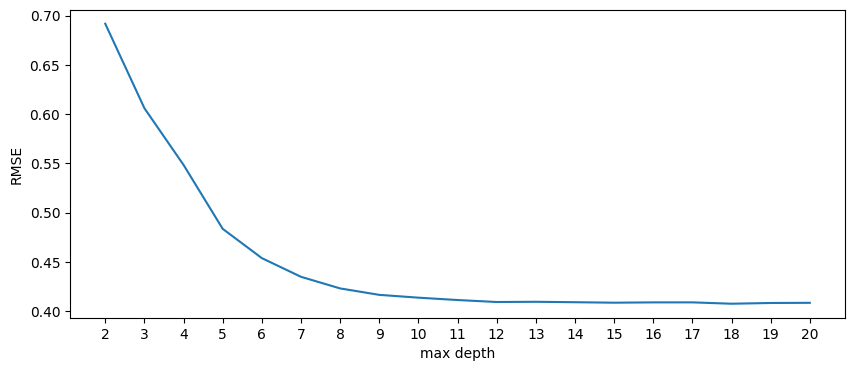

In [27]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(range(2,21), res)
plt.xlabel("max depth")
plt.ylabel("RMSE")
plt.xticks(range(2, 21), range(2, 21))
plt.show()

In [28]:
# Selected parameters
n_estimators = 100
max_depth = 8

In [29]:
print(f'RF, {max_depth = }, {n_estimators = }')
clf = RandomForestRegressor(max_depth=max_depth, n_estimators=n_estimators)
scaler = StandardScaler()
scaler_y = StandardScaler()

clf.fit(scaler.fit_transform(X_train), np.ravel(scaler_y.fit_transform(y_train)))
r2 = clf.score(scaler.transform(X_val), np.ravel(scaler_y.transform(y_val)))
y_hat = clf.predict(scaler.transform(X_val))

rmse = metrics.mean_squared_error(np.ravel(scaler_y.transform(y_val)), y_hat, squared=False)
print(f'VAL: {r2 = }, {rmse = }')

r2 = clf.score(scaler.transform(X_test), np.ravel(scaler_y.transform(y_test)))
y_hat = clf.predict(scaler.transform(X_test))
rmse = metrics.mean_squared_error(np.ravel(scaler_y.transform(y_test)), y_hat, squared=False)
print(f'TEST: {r2 = }, {rmse = }')

RF, max_depth = 8, n_estimators = 100
VAL: r2 = 0.8051358230507881, rmse = 0.42703710015979185
TEST: r2 = 0.8288624523259647, rmse = 0.4035834707774702


In [14]:
clf = RandomForestRegressor(max_depth=max_depth, n_estimators=n_estimators)
scaler = StandardScaler()
scaler_y = StandardScaler()
clf.fit(scaler.fit_transform(X_train), np.ravel(scaler_y.fit_transform(y_train)))
y_hat = clf.predict(scaler.transform(X_test))

In [30]:
aux = pd.DataFrame()

aux['test values'] = y_test
aux['predicted values'] = scaler_y.inverse_transform(y_hat.reshape(-1,1))

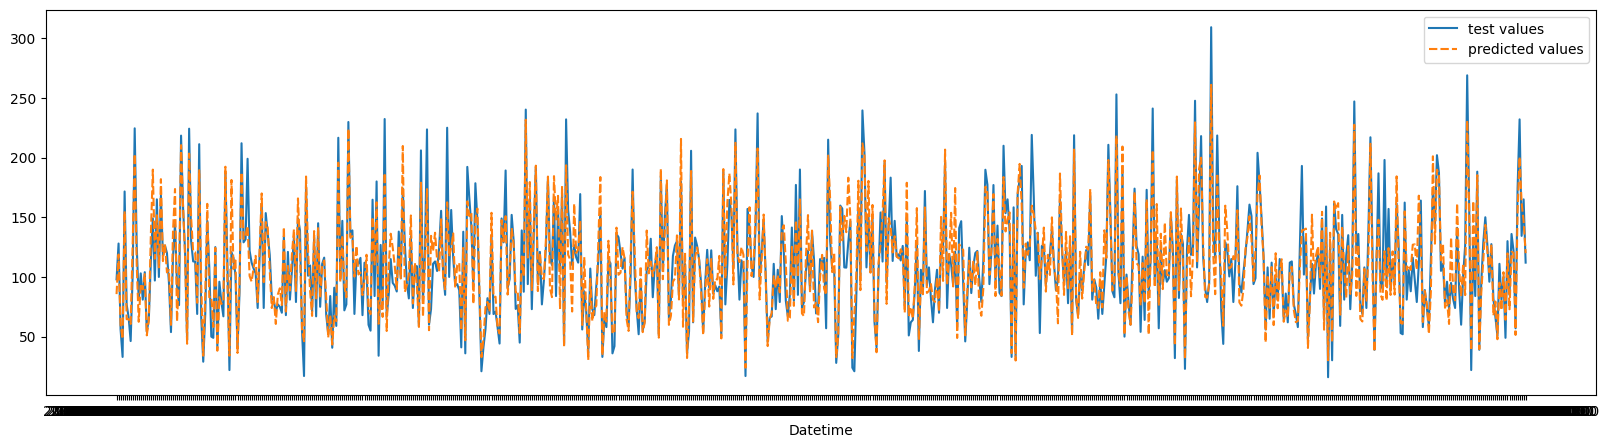

In [31]:
import seaborn as sns#aux = aux.reset_index().drop(['Datetime'], axis = 1)

plt.figure(figsize=(20,5))
sns.lineplot(data=aux.iloc[300:1000,:])
plt.show()

### Feature selection on Neural Network

In [ ]:
import warnings
from sklearn.model_selection import train_test_split
from tensorflow.keras.regularizers import L1
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error, r2_score
seed = 42

In [ ]:
# Load the CSV file
data = pd.read_csv("data_dausare.csv")
data = data.set_index('Datetime')
# Remove any missing values
data = data.dropna(subset = ["NO2(GT)"])
data = data.dropna(subset = ["T"])

from sklearn.preprocessing import MinMaxScaler

target = pd.DataFrame(data['NO2(GT)'])
X = data.drop(['NO2(GT)'], axis=1)
print('NO2 data_normset shape',X.shape)
print('Target shape', target.shape)
X.describe()

scaler_x = MinMaxScaler()
x_scaled = scaler_x.fit_transform(X)
x_scaled = pd.DataFrame(x_scaled, columns=X.columns)

scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(target) 
y_scaled = pd.DataFrame(y_scaled, columns=target.columns)

x_train, x_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=seed, shuffle=True)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.15, random_state=seed, shuffle=True)

K = 1
all_cols = [c for c in list(x_train.columns.values)]
assert 1 <= K and K <= len(all_cols)
print(f'>>> {K=}')

cols = [list(x) for x in itertools.combinations(all_cols, K)]

scaler = StandardScaler()
res = []
for c in tqdm(cols):
    _x_train = x_train.drop(columns=c) 
    _x_val = x_val.drop(columns=c)
    _x_train = x_train.drop(columns=c)
    _x_test = x_test.drop(columns=c)
    input_shape = _x_train.shape[1:]


    def build_model():
        model=keras.Sequential([
            layers.Dense(128, activation='relu', input_shape=input_shape),
            layers.Dense(64, activation='relu'),
            layers.Dense(32, activation='relu'),
            layers.Dense(1)
        ])

        # No activation is used in the last layer as this is regression
        optimizer= tf.keras.optimizers.Adam(0.001)
        
        model.compile(loss='mse',
                    optimizer= optimizer,
                    metrics= ['mae', 'mse'])
        return model

    model = build_model()
    early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='min', restore_best_weights=False)
    model.fit(
    _x_train, y_train,
    epochs=200,
    validation_data=(_x_val, y_val),
    verbose=0, 
    callbacks= [early_stopping_cb])

    y_pred = model.predict(_x_test)
    r2 = r2_score(y_test,y_pred)
    
    rmse = mean_squared_error(y_test,y_pred)
    res.append({
        'dropping': c,
        'remaining_cols': list(_x_train.columns.values),
        'r2': r2,
        'rmse': rmse,
    })


print(res)
pd.DataFrame(res).to_csv(f'NN_{K}_select.csv')
print('>>> Saved')

NO2 data_normset shape (7393, 7)
Target shape (7393, 1)
>>> K=1


  0%|          | 0/7 [00:00<?, ?it/s]

Epoch 123: early stopping
47/47 [==============================] - 0s 2ms/step


 14%|█▍        | 1/7 [00:52<05:12, 52.16s/it]

Epoch 96: early stopping
47/47 [==============================] - 0s 2ms/step


 29%|██▊       | 2/7 [01:30<03:39, 43.87s/it]

47/47 [==============================] - 0s 2ms/step


 43%|████▎     | 3/7 [02:53<04:08, 62.06s/it]

Epoch 115: early stopping
47/47 [==============================] - 0s 2ms/step


 57%|█████▋    | 4/7 [03:42<02:50, 56.80s/it]

Epoch 139: early stopping
47/47 [==============================] - 0s 2ms/step


 71%|███████▏  | 5/7 [05:05<02:12, 66.35s/it]

Epoch 67: early stopping
47/47 [==============================] - 0s 2ms/step


 86%|████████▌ | 6/7 [05:34<00:53, 53.53s/it]

Epoch 150: early stopping
47/47 [==============================] - 0s 2ms/step


100%|██████████| 7/7 [06:57<00:00, 59.69s/it]

[{'dropping': ['PT08.S1(CO)'], 'remaining_cols': ['PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S5(O3)', 'T', 'RH', 'AH'], 'r2': 0.7420413710585805, 'rmse': 566.4479218418949}, {'dropping': ['PT08.S2(NMHC)'], 'remaining_cols': ['PT08.S1(CO)', 'PT08.S3(NOx)', 'PT08.S5(O3)', 'T', 'RH', 'AH'], 'r2': 0.7399680543907097, 'rmse': 571.0006903329318}, {'dropping': ['PT08.S3(NOx)'], 'remaining_cols': ['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S5(O3)', 'T', 'RH', 'AH'], 'r2': 0.7573226098579211, 'rmse': 532.8920528384897}, {'dropping': ['PT08.S5(O3)'], 'remaining_cols': ['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'T', 'RH', 'AH'], 'r2': 0.7169808350425448, 'rmse': 621.4780195160108}, {'dropping': ['T'], 'remaining_cols': ['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S5(O3)', 'RH', 'AH'], 'r2': 0.6222940822990308, 'rmse': 829.3994003111499}, {'dropping': ['RH'], 'remaining_cols': ['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S5(O3)', 'T', 'AH'], 'r2': 0.6397623506295174, 'rmse': 791.0

worsening in any case